<a href="https://colab.research.google.com/github/Taufik-png/Portofolio/blob/main/Tugas_3_Muh_Taufik_H_Analisis_Sentimen_Blackpink.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANALISIS SENTIMEN BLACKPINK

Memulai proses analisis sentimen...

--- Langkah 1: Memuat dan Memeriksa Data ---
File 'Blackpink.csv' berhasil dimuat.
Jumlah total tweet sebelum dibersihkan: 1503
Jumlah tweet setelah menghapus duplikat dan baris kosong: 1462

--- Langkah 2: Pembersihan dan Pemrosesan Teks ---
Pembersihan teks selesai. Kolom 'cleaned_text' telah dibuat.

--- Langkah 3: Klasifikasi Sentimen (Metode Machine Learning) ---
Memuat model machine learning... Proses ini mungkin memakan waktu beberapa menit.


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/328 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Model berhasil dimuat.
Klasifikasi sentimen untuk semua tweet selesai.

--- Langkah 4: Hasil Analisis & Visualisasi ---
Hasil Agregat Analisis Sentimen:
sentiment
Netral     723
Negatif    448
Positif    291
Name: count, dtype: int64

Persentase Sentimen:
sentiment
Netral     49.45
Negatif    30.64
Positif    19.90
Name: count, dtype: float64


/tmp/ipython-input-35198543.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['#FF6B6B', '#6BCB77', '#FFD93D'], order=['Negatif', 'Positif', 'Netral'])


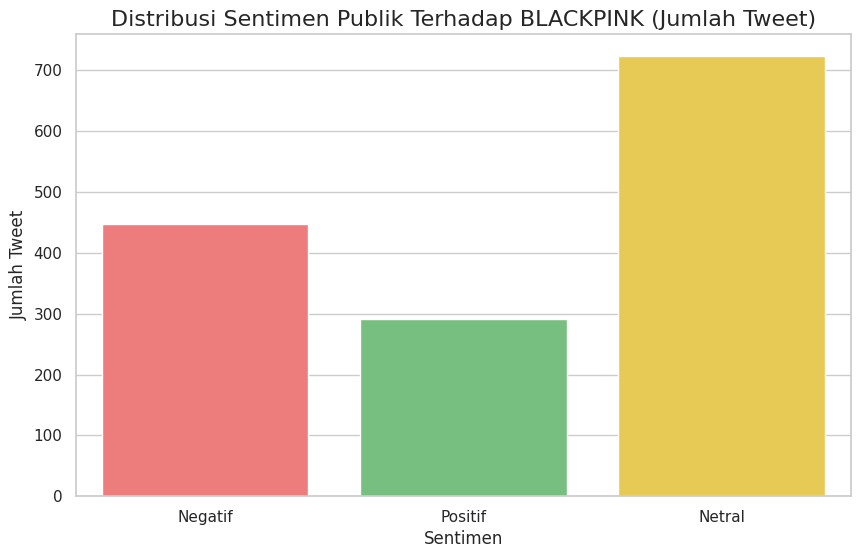

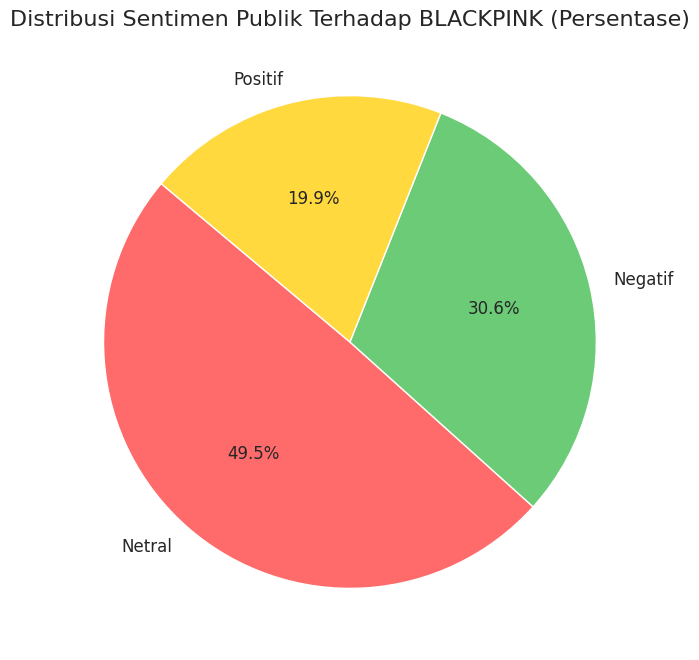


--- Langkah 5: Contoh Cuitan dari Setiap Kategori Sentimen ---

[+] Contoh Tweet Positif:
                                                                                                                                                                   full_text
0   Alhamdulillah Daddy dh mule gohit beskal dan menjaja di pantai morib hurm kemaen susah nk suruh duduk dekat rumah bapak ey bapak ey @elonmusk @POTUS @X @BLACKPINK @grok
2                                                                                                                                    @blinkmf Minimal makasih sih @BLACKPINK
14                                                                                            aaaa mau challenge sama blackpink unnie pasti sangat dar der dor seluruh dunia

[-] Contoh Tweet Negatif:
                                                                                                                                                                   full_text
1                

In [1]:

import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline

print("Memulai proses analisis sentimen...\n")

# --- LANGKAH 1: MEMUAT DAN MEMERIKSA DATA ---
print("--- Langkah 1: Memuat dan Memeriksa Data ---")
try:
    # Menggunakan parameter 'lineterminator' untuk mengatasi potensi masalah baris
    df = pd.read_csv('Blackpink.csv', lineterminator='\n')
    # Membersihkan nama kolom dari spasi atau karakter aneh
    df.columns = df.columns.str.strip()
    print("File 'Blackpink.csv' berhasil dimuat.")
    print(f"Jumlah total tweet sebelum dibersihkan: {len(df)}")
except FileNotFoundError:
    print("ERROR: File 'Blackpink.csv' tidak ditemukan.")
    # Menampilkan pesan error yang lebih informatif
    print("Pastikan file Blackpink.csv sudah berada di direktori yang sama dengan script ini.")
    exit()

# Membersihkan data: hapus baris tanpa teks dan duplikat
df.dropna(subset=['full_text'], inplace=True)
df.drop_duplicates(subset=['full_text'], keep='first', inplace=True)
print(f"Jumlah tweet setelah menghapus duplikat dan baris kosong: {len(df)}\n")


# --- LANGKAH 2: PEMBERSIHAN DAN PEMROSESAN TEKS ---
print("--- Langkah 2: Pembersihan dan Pemrosesan Teks ---")

# Kamus sederhana untuk normalisasi kata-kata umum/slang
alay_dict = {
    'yg': 'yang', 'ga': 'tidak', 'gak': 'tidak', 'gaktau': 'tidak tahu',
    'bgmn': 'bagaimana', 'sdh': 'sudah', 'utk': 'untuk', 'dg': 'dengan',
    'bkn': 'bukan', 'krn': 'karena', 'aja': 'saja', 'blm': 'belum',
    'dgn': 'dengan', 'jg': 'juga', 'jd': 'jadi', 'sm': 'sama', 'lg': 'lagi'
}

def clean_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'@[A-Za-z0-9_]+', ' ', text)  # Hapus @mentions
    text = re.sub(r'#\w+', ' ', text)  # Hapus #hashtags
    text = re.sub(r'http\S+|www\S+', ' ', text)  # Hapus URL
    text = re.sub(r'[^a-z\s]', ' ', text)  # Hapus karakter non-alfabet
    words = text.split()
    normalized_words = [alay_dict.get(word, word) for word in words]
    text = ' '.join(normalized_words)
    return text.strip()

# Terapkan pembersihan pada kolom 'full_text'
df['cleaned_text'] = df['full_text'].apply(clean_text)
print("Pembersihan teks selesai. Kolom 'cleaned_text' telah dibuat.\n")


# --- LANGKAH 3: KLASIFIKASI SENTIMEN (METODE MACHINE LEARNING) ---
print("--- Langkah 3: Klasifikasi Sentimen (Metode Machine Learning) ---")
print("Memuat model machine learning... Proses ini mungkin memakan waktu beberapa menit.")

try:
    # Menggunakan model yang telah dilatih khusus untuk sentimen Bahasa Indonesia
    pretrained_name = "w11wo/indonesian-roberta-base-sentiment-classifier"
    sentiment_classifier = pipeline(
        "sentiment-analysis",
        model=pretrained_name,
        tokenizer=pretrained_name
    )
    print("Model berhasil dimuat.")
except Exception as e:
    print(f"Gagal memuat model. Pastikan library 'transformers' dan 'torch' terinstal.")
    print(f"Error: {e}")
    exit()

# Menerapkan model pada setiap teks yang sudah dibersihkan
# 'truncation=True' untuk memotong teks yang terlalu panjang agar sesuai dengan model
sentiments = sentiment_classifier(df['cleaned_text'].tolist(), truncation=True)
print("Klasifikasi sentimen untuk semua tweet selesai.\n")

# Mengambil hasil label (misal: 'positive', 'negative', 'neutral')
# dan menyesuaikannya ke Bahasa Indonesia
label_mapping = {'positive': 'Positif', 'negative': 'Negatif', 'neutral': 'Netral'}
df['sentiment'] = [label_mapping[s['label']] for s in sentiments]


# --- LANGKAH 4: HASIL ANALISIS & VISUALISASI ---
print("--- Langkah 4: Hasil Analisis & Visualisasi ---")
sentiment_counts = df['sentiment'].value_counts()
total_tweets = len(df)

# Menghitung persentase
sentiment_percentages = (sentiment_counts / total_tweets) * 100

print("Hasil Agregat Analisis Sentimen:")
print(sentiment_counts)
print("\nPersentase Sentimen:")
print(sentiment_percentages.round(2))

# Visualisasi Hasil
sns.set(style="whitegrid")

# Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['#FF6B6B', '#6BCB77', '#FFD93D'], order=['Negatif', 'Positif', 'Netral'])
plt.title('Distribusi Sentimen Publik Terhadap BLACKPINK (Jumlah Tweet)', fontsize=16)
plt.xlabel('Sentimen', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)
plt.xticks(fontsize=11)
plt.show()
plt.close()

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140,
        colors=['#FF6B6B', '#6BCB77', '#FFD93D'], textprops={'fontsize': 12})
plt.title('Distribusi Sentimen Publik Terhadap BLACKPINK (Persentase)', fontsize=16)
plt.ylabel('')
plt.show()
plt.close()


# --- LANGKAH 5: MENAMPILKAN CONTOH TWEET ---
print("\n--- Langkah 5: Contoh Cuitan dari Setiap Kategori Sentimen ---")
pd.set_option('display.max_colwidth', None) # Agar teks tweet tidak terpotong

print("\n[+] Contoh Tweet Positif:")
print(df[df['sentiment'] == 'Positif'][['full_text']].head(3))

print("\n[-] Contoh Tweet Negatif:")
print(df[df['sentiment'] == 'Negatif'][['full_text']].head(3))

print("\n[=] Contoh Tweet Netral:")
print(df[df['sentiment'] == 'Netral'][['full_text']].head(3))


# --- LANGKAH 6: KESIMPULAN ANALISIS ---
print("\n--- Langkah 6: Kesimpulan Tren Opini Publik ---")
dominant_sentiment = sentiment_counts.idxmax()
dominant_percentage = sentiment_percentages.max()

print(f"Berdasarkan analisis {total_tweets} tweet, sentimen publik terhadap BLACKPINK didominasi oleh sentimen {dominant_sentiment} sebesar {dominant_percentage:.2f}%.")
print("Analisis sentimen ini menunjukkan tren opini publik yang dominan terhadap BLACKPINK, meskipun isu-isu spesifik yang menyebabkan sentimen tersebut tidak dapat ditentukan secara langsung oleh model ini.")
print("Sentimen positif umumnya terkait dengan dukungan terhadap musik, penampilan, atau anggota grup, sementara sentimen negatif mungkin terkait dengan kritik terhadap manajemen, jadwal comeback, atau isu-isu lain.")


# --- LANGKAH 7: PENYIMPANAN HASIL ---
output_filename = 'blackpink_sentimen_analisis.csv'
df.to_csv(output_filename, index=False, encoding='utf-8-sig')
print(f"\n--- Proses Selesai ---")
print(f"Hasil analisis lengkap telah disimpan dalam file: '{output_filename}'")